# 1. Introduction

## 1.1 Automobile Dataset Overview

This dataset contains detailed information about various automobiles, including their specifications, performance metrics, and pricing. The dataset is structured with the following columns:

symboling: A risk factor associated with the automobile, ranging from -3 (high risk) to 3 (low risk).

normalized-losses: The relative average loss payment per insured vehicle year, normalized for all automobiles within a particular size classification.

make: The manufacturer or brand of the automobile.

fuel-type: The type of fuel used by the automobile (e.g., gas, diesel).

aspiration: The type of aspiration system (e.g., standard, turbo).

num-of-doors: The number of doors on the automobile.

body-style: The body style of the automobile (e.g., sedan, hatchback, convertible).

drive-wheels: The type of drive wheels (e.g., front-wheel drive, rear-wheel drive, 4-wheel drive).

engine-location: The location of the engine (e.g., front, rear).

wheel-base: The distance between the centers of the front and rear wheels.

length: The length of the automobile.

width: The width of the automobile.

height: The height of the automobile.

curb-weight: The weight of the automobile without passengers or cargo.

engine-type: The type of engine (e.g., ohc, ohcv, dohc).

num-of-cylinders: The number of cylinders in the engine.

engine-size: The size of the engine, typically measured in cubic centimeters (cc).

fuel-system: The type of fuel system (e.g., mpfi, 2bbl).

bore: The diameter of the engine's cylinders.

stroke: The length of the piston stroke within the cylinder.

compression-ratio: The ratio of the volume of the combustion chamber from its largest capacity to its smallest capacity.

horsepower: The power output of the engine, measured in horsepower.

peak-rpm: The maximum revolutions per minute (RPM) the engine can achieve.

city-mpg: The fuel efficiency of the automobile in city driving conditions, measured in miles per gallon (mpg).

highway-mpg: The fuel efficiency of the automobile in highway driving conditions, measured in miles per gallon (mpg).

price: The retail price of the automobile.

This dataset is useful for analyzing various aspects of automobiles, such as their performance, fuel efficiency, and pricing, based on their specifications and features. It can be used for tasks such as predictive modeling, classification, and exploratory data analysis in the automotive industry. exploratory data analysis in the automotive industry.

# 2. Python Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 3. Import Dataset & First Organization

In [ ]:
df=pd.read_csv('E:/Python Projects/shohreh/Artificial intelligence - Mehdi Abbasi/GitHub_Repository/Data-Analysis-And-Machine-Learning-Projects/2. Marketing and Customer Analysis/Automobile Dataset/Automobile_data.csv')
df.head(2)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.describe().T

In [ ]:
df.columns

## 3.1 Analyzing Features Unique Values

In [ ]:
pd.DataFrame(df.nunique(), columns=['Number of unique Values'])

## 3.2 In-Depth Analysis Of Unique Values

In [ ]:
### first Try
# Return unique values and their size
#def value_counts(col):
 #   return pd.DataFrame(df[col].value_counts()).head(10)

In [ ]:
def value_counts(col, top_n=20):
    """
    Returns the top N unique values and their counts for a specified column.

    Parameters:
    - col (str): The column name for which to calculate value counts.
    - top_n (int): The number of top unique values to return (default is 10).

    Returns:
    - pd.DataFrame: A DataFrame containing the top N unique values and their counts.
    """
    # Calculate value counts and convert to DataFrame
    value_counts_df = pd.DataFrame(df[col].value_counts().head(top_n))
    
    # Rename columns for better readability
    value_counts_df.columns = ['Count']
    
    # Reset index to make the unique values a column
    value_counts_df.reset_index(inplace=True)
    value_counts_df.rename(columns={'index': col}, inplace=True)
    
    return value_counts_df

In [ ]:
value_counts('fuel-system',3)

In [ ]:
value_counts('fuel-type')

## 3.3 In-Depth Analysis Of value of ? in columns

In [ ]:
# First try
#def find_columns(symbol):
#    col=[]
#   for i in range (0,len(df.columns)):
 #       print(f'Name of column: {df.columns[i]}')
  #      print(df[(df[df.columns[i]]==symbol)].head(2))
   #     print('*'*80)
    #    if df[(df[df.columns[i]]==symbol)].size!= 0:
     #       col.append(df.columns[i])
    #return col
#find_columns('?')

In [ ]:
# Second try
#def find_columns(df, symbol):
 #   """
  #  Find columns in a DataFrame that contain a specific symbol.
#
 #   Parameters:
  #  df (pd.DataFrame): The DataFrame to search.
   # symbol (any): The value to search for in the DataFrame.
#
 #   Returns:
  #  list: A list of column names containing the symbol.
   # """
    # List to store columns containing the symbol
    #columns_with_symbol = []

    # Iterate through each column in the DataFrame
    #for column in df.columns:
        # Check if the symbol exists in the column
     #   if df[column].isin([symbol]).any():
      #      print(f'Name of column: {column}')
       #     display(df[df[column] == symbol].head(2))
        #    print('*' * 80)
         #   columns_with_symbol.append(column)

   # return columns_with_symbol

In [ ]:
def find_columns(df, symbol, display_samples=True, max_samples=5):
    """
    Find columns in a DataFrame that contain a specific symbol.

    Parameters:
    df (pd.DataFrame): The DataFrame to search.
    symbol (any): The value to search for in the DataFrame.
    display_samples (bool): Whether to display sample rows for columns containing the symbol (default: True).
    max_samples (int): Maximum number of sample rows to display per column (default: 5).

    Returns:
    list: A list of column names containing the symbol.
    """
    # Use list comprehension to find columns containing the symbol
    columns_with_symbol = [column for column in df.columns if df[column].isin([symbol]).any()]

    # Display sample rows for columns containing the symbol (if enabled)
    if display_samples:
        for column in columns_with_symbol:
            # Filter rows where the column contains the symbol
            filtered_df = df[df[column] == symbol]
            count = filtered_df.shape[0]

            # Display column name and count of occurrences
            print(f'Name of column: {column}  Occurrences: {count}')

            # Display a sample of rows (up to max_samples)
            if count > 0:
                display(filtered_df.head(max_samples))
            print('*' * 80)

    return columns_with_symbol

In [ ]:
find_columns(df,'?')

# 4. Data Cleaning

**Within this section , we will try to find and solve any noise, inconsistencies or missing value.**

## 4.1 normalized-losses

In [ ]:
value_counts('normalized-losses')

In [ ]:
# Filter rows where 'normalized-losses' is not '?'
df_normalized_losses = df[df['normalized-losses'] != '?']

# Calculate the mean of 'normalized-losses' after converting to integers
mean_normalized_losses = round(df_normalized_losses['normalized-losses'].astype(int).mean())

# Replace '?' with the calculated mean in the original DataFrame
df['normalized-losses'] = df['normalized-losses'].replace('?', mean_normalized_losses)

## 4.2 num-of-doors

In [ ]:
value_counts('num-of-doors')

In [ ]:
# Replace '?' with the mode and map textual values to numeric values
df['num-of-doors']= df['num-of-doors'].replace('?',df['num-of-doors'].mode().iloc[0])
mapping_dict={'two': 2, 'four': 4}
df['num-of-doors']= df['num-of-doors'].map(mapping_dict)

## 4.3 bore

In [ ]:
value_counts('bore')

In [ ]:
# Filter rows where 'bore' is not '?'
df_bore = df[df['bore'] != '?']

# Calculate the mean of 'bore' after converting to integers
mean_bore = df_bore['bore'].astype(float).mean()

# Replace '?' with the calculated mean in the original DataFrame
df['bore'] = df['bore'].replace('?', mean_bore)

## 4.4 stroke

In [ ]:
value_counts('stroke')

In [ ]:
# Filter rows where 'stroke' is not '?'
df_stroke = df[df['stroke'] != '?']

# Calculate the mean of 'stroke' after converting to floats
mean_stroke = round(df_stroke['stroke'].astype(float).mean(),2)

# Replace '?' with the calculated mean in the original DataFrame
df['stroke'] = df['stroke'].replace('?', mean_stroke)

## 4.5 horsepower

In [ ]:
value_counts('horsepower')

In [ ]:
# Filter rows where 'horsepower' is not '?'
df_horsepower = df[df['horsepower'] != '?']

# Calculate the mean of 'horsepower' after converting to integers
mean_horsepower = round(df_horsepower['horsepower'].astype(int).mean())

# Replace '?' with the calculated mean in the original DataFrame
df['horsepower'] = df['horsepower'].replace('?', mean_horsepower)

## 4.6 peak-rpm

In [ ]:
value_counts('peak-rpm')

In [ ]:
# Filter rows where 'peak-rpm' is not '?'
df_peak_rpm = df[df['peak-rpm'] != '?']

# Calculate the mean of 'peak-rpm' after converting to integers
mean_peak_rpm = round(df_peak_rpm['peak-rpm'].astype(int).mean())

# Replace '?' with the calculated mean in the original DataFrame
df['peak-rpm'] = df['peak-rpm'].replace('?', mean_peak_rpm)

## 4.7 price

In [ ]:
value_counts('price')

In [ ]:
# Filter rows where 'price' is not '?'
df_price = df[df['price'] != '?']

# Calculate the mean of 'price' after converting to integers
mean_price = round(df_price['price'].astype(int).mean())

# Replace '?' with the calculated mean in the original DataFrame
df['price'] = df['price'].replace('?', mean_price)

## 4.8 num-of-cylinders

In [ ]:
value_counts('num-of-cylinders')

In [ ]:
# map textual values to numeric values
mapping_dict={'two': 2, 'three':3, 'four': 4, 'five':5, 'six':6, 'eight':8, 'twelve':12 }
df['num-of-cylinders']= df['num-of-cylinders'].map(mapping_dict)

## 4.9 correcting columns dtype

In [ ]:
# first try
def change_type(df,dtype,columns):
    for col in columns:
        df[col]=df[col].astype(dtype)


In [ ]:
change_type(df, 'float', [['bore', 'stroke']])

In [ ]:
change_type(df,'int64',[['normalized-losses','horsepower', 'peak-rpm', 'price']])

In [ ]:
df.info()

## 4.10 check outliers 

### 4.10.1 detect outliers Using Visualization Methods with Box Plot

In [ ]:
# Select numeric columns
numeric_columns=df.select_dtypes(include=['number']).columns
print(numeric_columns)

In [109]:
import seaborn as sns

def outliers_BoxPlot(df, columns, figsize=(8, 6), color='skyblue'):
    """
    Generate box plots for specified columns to visualize outliers.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of numeric column names to plot.
    figsize (tuple): Size of the figure (width, height) (default: (8, 6)).
    color (str): Color of the box plot (default: 'skyblue').
    """
    # Iterate through each column and create a box plot
    for col in columns:
        plt.figure(figsize=figsize)  # Set figure size
        sns.boxplot(x=df[col], color=color)  # Create box plot
        plt.title(f'Box Plot for {col}', fontsize=14)  # Add title
        plt.xlabel(col, fontsize=12)  # Add x-axis label
        plt.ylabel('Values', fontsize=12)  # Add y-axis label
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
        plt.show()  # Display the plot

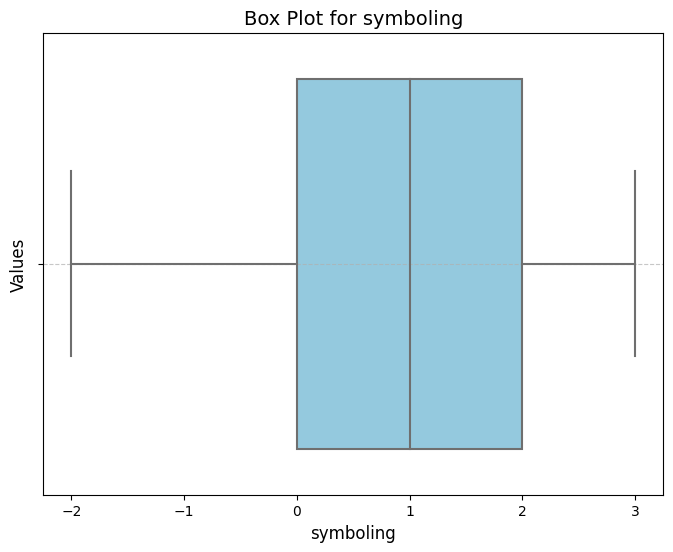

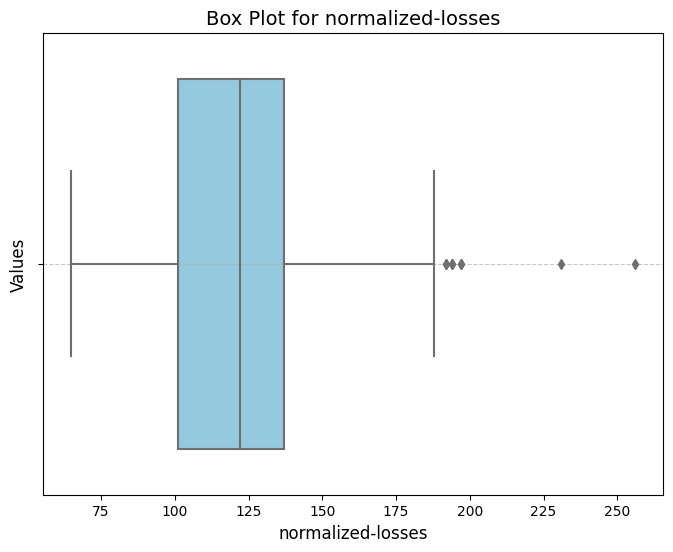

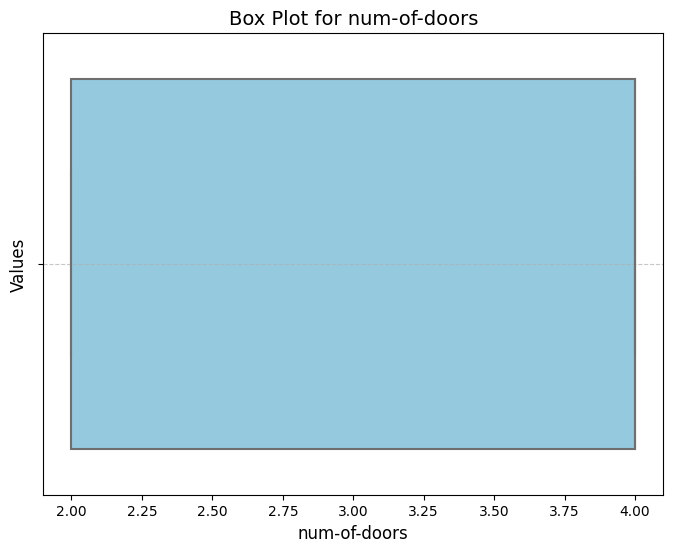

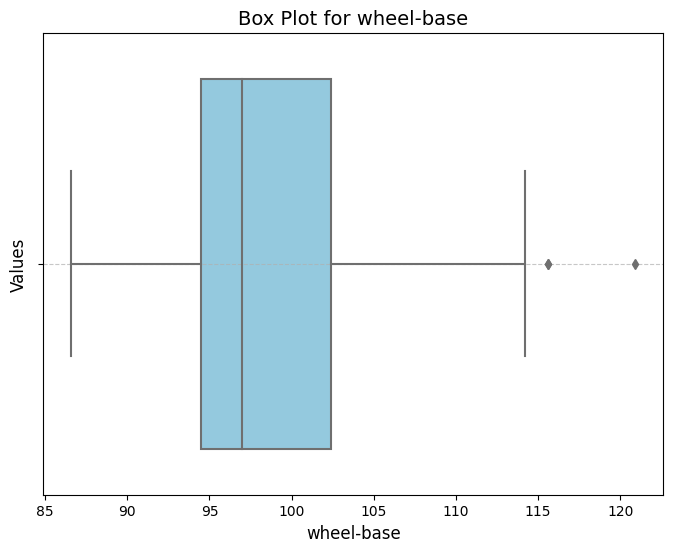

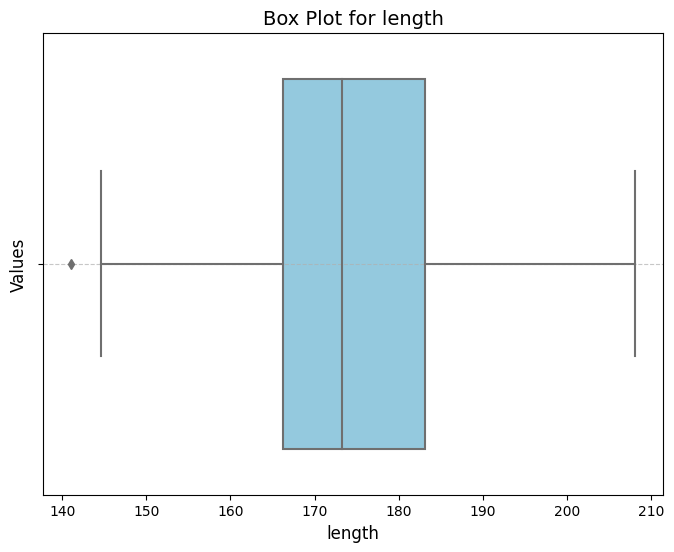

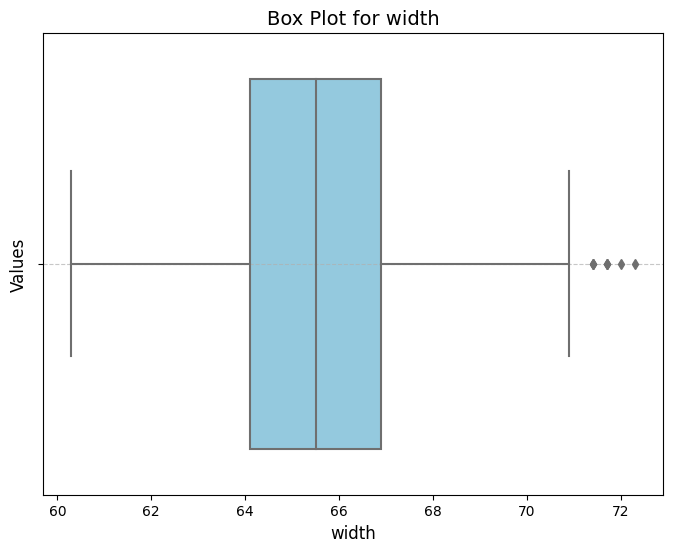

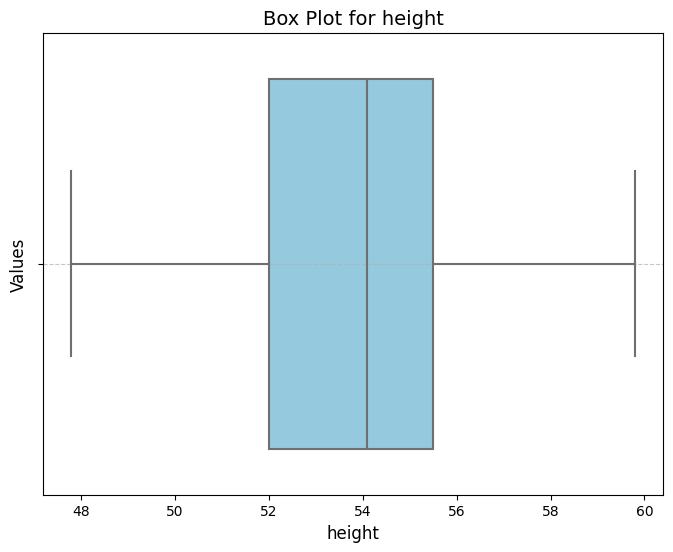

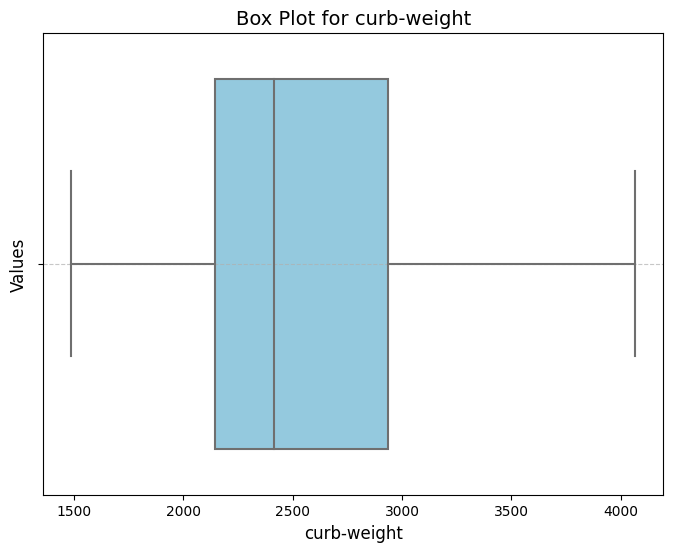

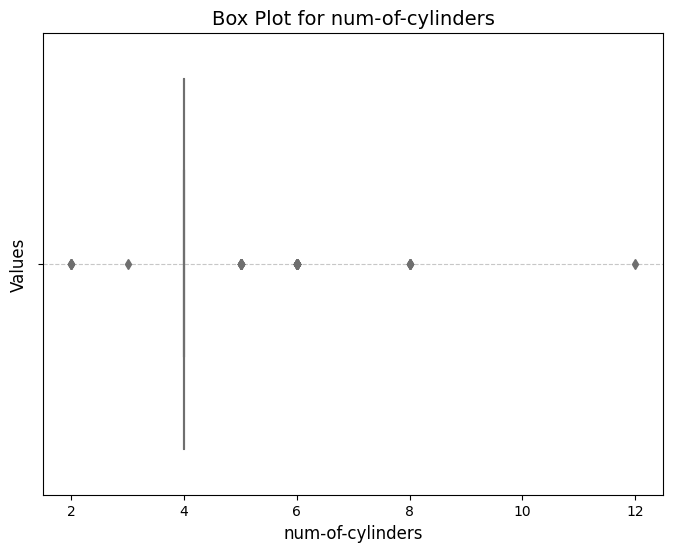

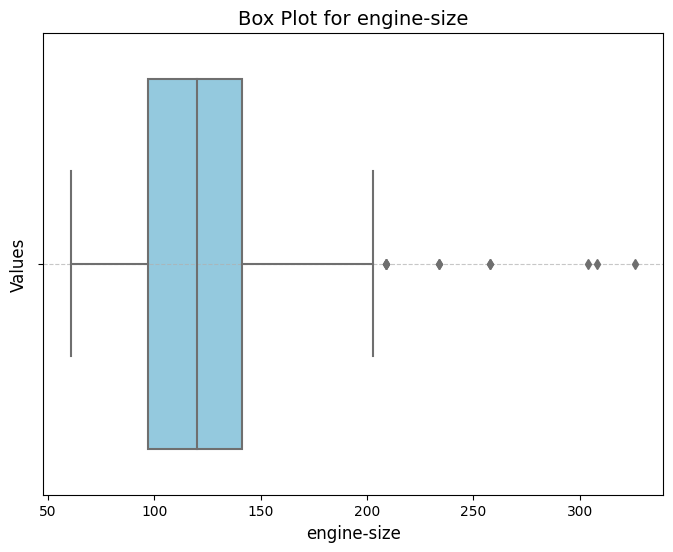

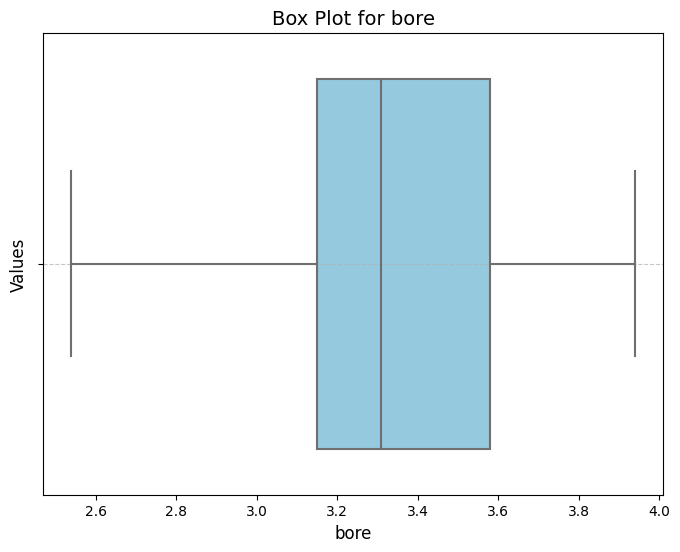

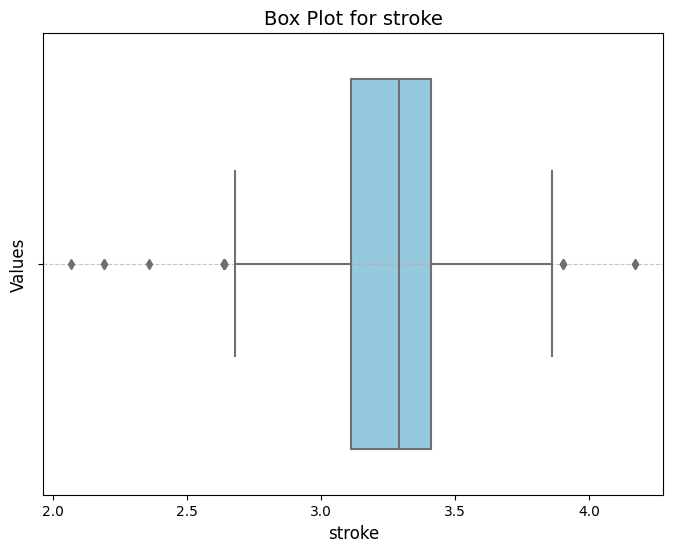

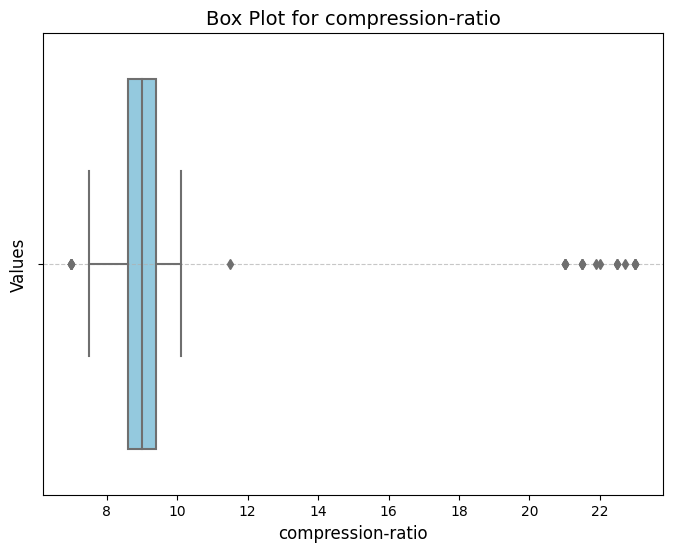

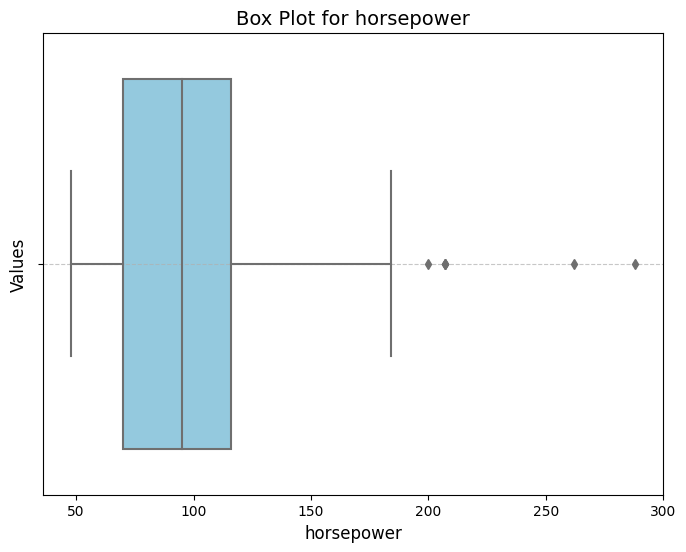

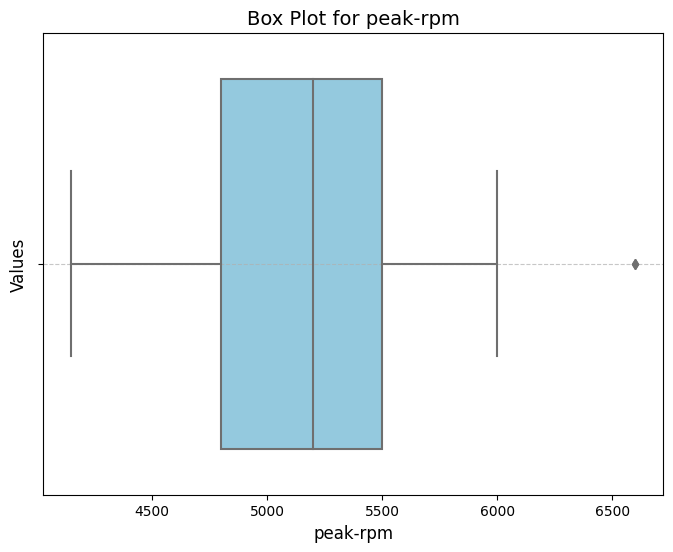

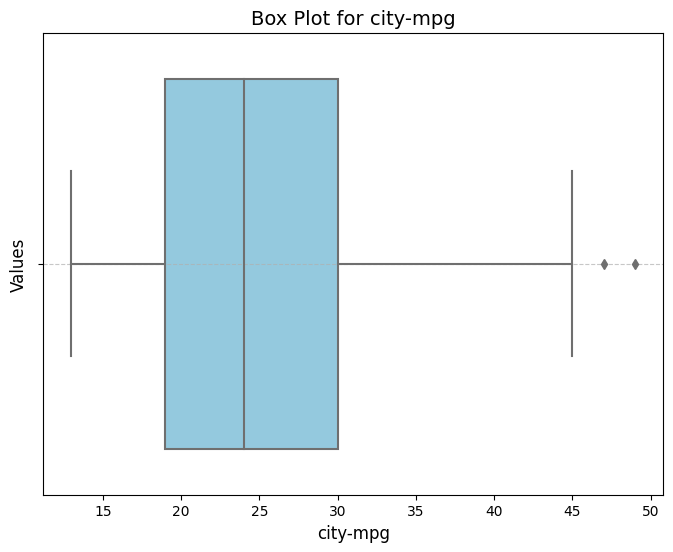

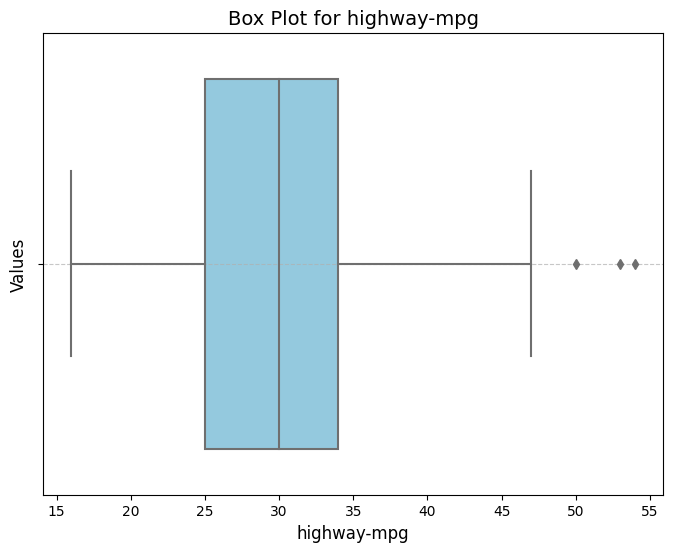

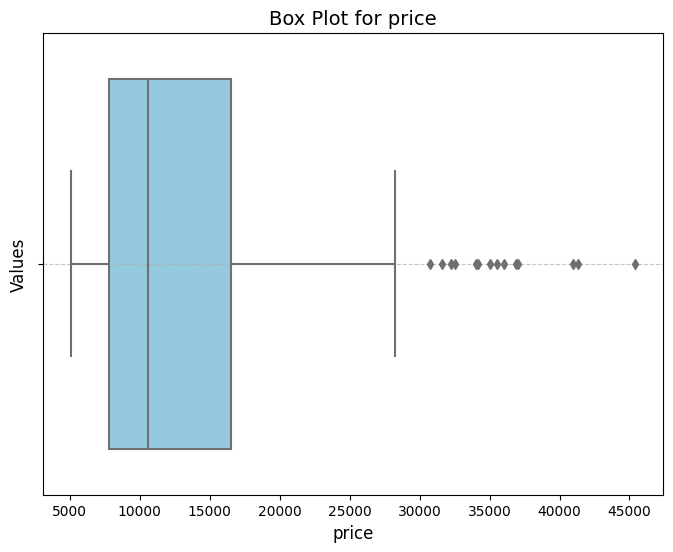

In [100]:
outliers_BoxPlot(df,numeric_columns)

### 4.10.2 Outliers Imputation Using Median, Mode, Mean

In [ ]:
def remove_outliers(df,min,max)


In [108]:
q1=df['normalized-losses'].quantile(.25)
q3=df['normalized-losses'].quantile(.75)
iqr=q3 - q1
min=q1 - 1.5 * iqr
max= q3 + 1.5 *iqr
df=df[(df['normalized-losses'] < 75) | (df['normalized-losses'] > 175)]

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers